## 导入数据

In [1]:
# 导入包

# 忽略警告提示
import warnings
warnings.filterwarnings('ignore')

# 导入数据处理包
import numpy as np
import pandas as pd

# 绘图包
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib
# matplotlib.use('qt4agg')
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False

# 时间序列
from datetime import datetime

In [2]:
# 导入数据 
# 注意更改文件路径
data = pd.read_csv('E:\\Kaggle课件_共享单车预测\\Data\\train.csv',engine='python')   

##  查看数据

In [3]:
# 查看数据变量
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# 查看缺失值、数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


## 描述统计

In [5]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# 数据预处理

##  列名重命名

In [6]:
# 列名字典
columns_dict = {
    'season':'季节',
    'holiday':'假日',
    'workingday':'工作日',
    'weather':'天气',
    'temp':'气温',
    'atemp':'体感温度',
    'humidity':'湿度',
    'windspeed':'风速',
    'casual':'非会员使用量',
    'registered':'会员使用量',
    'count':'使用总量',
    'datetime':'日期时间'
}

# 列名重命名
data.rename(columns=columns_dict, inplace=True)
data.head()

,日期时间,季节,假日,工作日,天气,气温,体感温度,湿度,风速,非会员使用量,会员使用量,使用总量
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# #数据变换
###将日期时间拆分为日期、年、月、星期、日、小时，便于之后分析。

In [7]:
#日期时间拆分
data['日期']=data['日期时间'].apply( lambda c : c.split( )[0])
data['星期']=data['日期'].apply( lambda c : datetime.strptime(c,'%Y-%m-%d').isoweekday())
data['年']=data['日期时间'].apply( lambda c : c.split( )[0].split('-')[0]).astype('int')
data['月']=data['日期时间'].apply( lambda c : c.split( )[0].split('-')[1]).astype('int')
data['日']=data['日期时间'].apply( lambda c : c.split( )[0].split('-')[2]).astype('int')
data['小时']=data['日期时间'].apply( lambda c : c.split( )[1].split(':')[0]).astype('int')
data.head(5)

,日期时间,季节,假日,工作日,天气,气温,体感温度,湿度,风速,非会员使用量,会员使用量,使用总量,日期,星期,年,月,日,小时
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,6,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,6,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,6,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,6,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,6,2011,1,1,4


## 数据清洗
数据不存在重复值和异常值，仅对异常值进行处理。

先用图形分析异常值。

[Text(0.5, 0, '使用总量'), Text(0.5, 1.0, '借车总数分布图')]

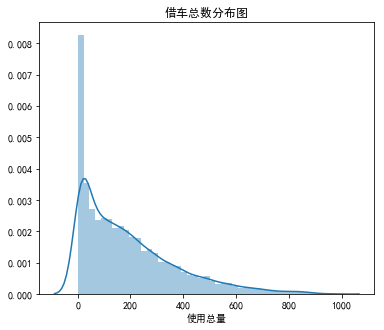

In [8]:
# 数值型数据分布分析

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

fig.set_size_inches(6,5)
sns.distplot(data['使用总量'])

ax.set(xlabel='使用总量',title='借车总数分布图')

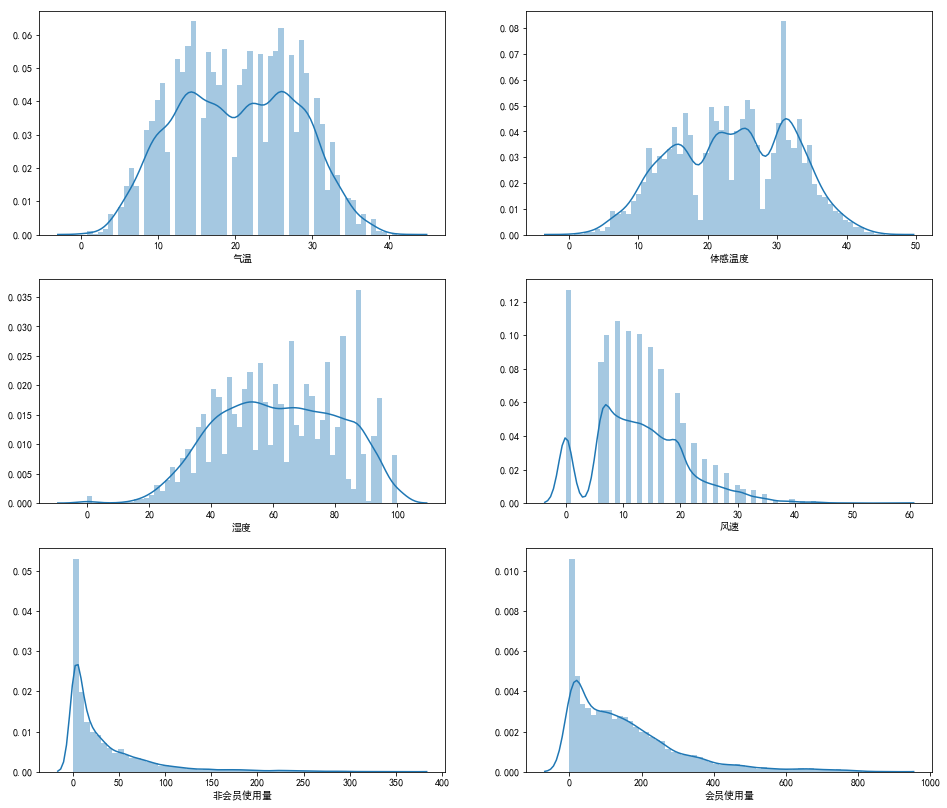

In [9]:
# 数值型数据分布分析
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(16,14)

sns.distplot(data['气温'],bins = 60,ax=axes[0,0])
sns.distplot(data['体感温度'],bins = 60,ax=axes[0,1])
sns.distplot(data['湿度'],bins = 60,ax=axes[1,0])
sns.distplot(data['风速'],bins = 60,ax=axes[1,1])
sns.distplot(data['非会员使用量'],bins = 60,ax=axes[2,0])
sns.distplot(data['会员使用量'],bins = 60,ax=axes[2,1])

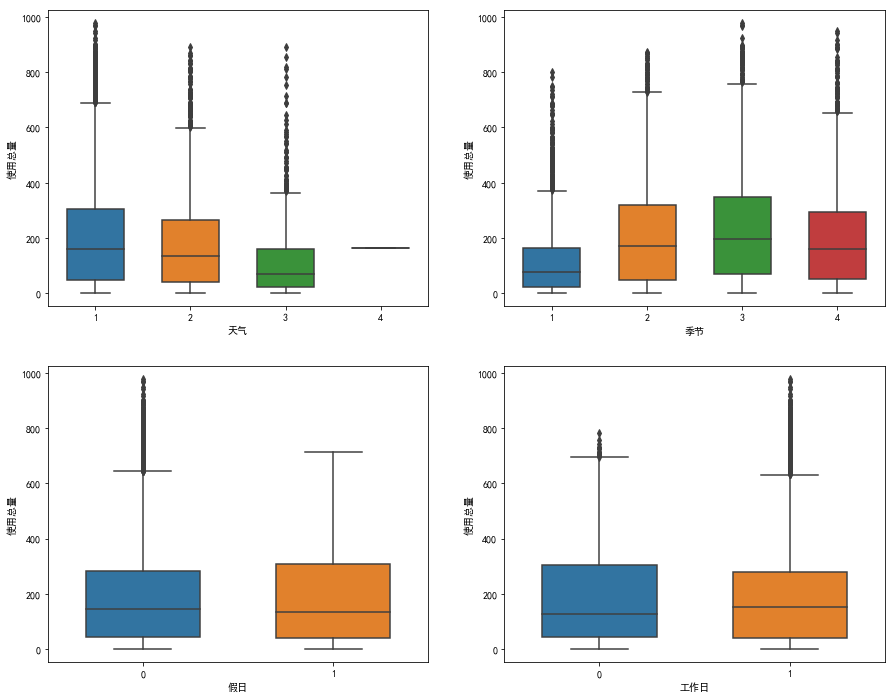

In [10]:
# 类别型数据箱线图分析
fig, axes = plt.subplots(2,2)
fig.set_size_inches(15, 12)

sns.boxplot(x = '天气',y='使用总量', data = data,orient='v', width=0.6,ax=axes[0,0])
sns.boxplot(x='季节', y='使用总量', data = data, orient='v', width=0.6, ax=axes[0,1])
sns.boxplot(x='假日', y='使用总量', data = data, orient='v', width=0.6, ax=axes[1,0])
sns.boxplot(x='工作日', y='使用总量', data = data, orient='v', width=0.6, ax=axes[1,1])

通过图形发现自行车使用量呈长尾分布，风速0-10中存在异常值，这里使用随即森林进行填充。

In [11]:
#对风速中的0值进行替换
#了解对冯素产生影响的因素
corrDf = data.corr() 
corrDf['风速'].sort_values(ascending =False)

风速        1.000000
小时        0.146631
使用总量      0.101369
非会员使用量    0.092276
会员使用量     0.091052
日         0.036157
工作日       0.013373
假日        0.008409
天气        0.007261
年        -0.015221
气温       -0.017852
星期       -0.024804
体感温度     -0.057473
季节       -0.147121
月        -0.150192
湿度       -0.318607
Name: 风速, dtype: float64

使用随机森林

In [12]:
from sklearn.ensemble import RandomForestRegressor



# 将数据分成风速等于0和不等于两部分
wind_0 = data[data["风速"]==0]
wind_1 = data[data["风速"]!=0]

#选定模型
Model_wind = RandomForestRegressor(n_estimators=1000,random_state=42)

# 选定特征值
windspeed_X = wind_1[["小时","使用总量","季节","月","湿度"]]

# 选定标签值
windspeed_y = wind_1["风速"]

#选定预测特征值
windspeedpre_X = wind_0[["小时","使用总量","季节","月","湿度"]]

# 将风速不等于0的数据作为训练集，fit到RandomForestRegressor之中
Model_wind.fit(windspeed_X, windspeed_y)


#通过训练好的模型预测风速
wind_0Values = Model_wind.predict( X = windspeedpre_X )

#将预测的风速填充到风速为零的数据中
wind_0.loc[:,"风速"] = wind_0Values

连接两部分数据

In [13]:
#连接两部分数据
data = wind_1.append(wind_0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

[Text(0.5, 0, '风速'), Text(0.5, 1.0, '风速分布图')]

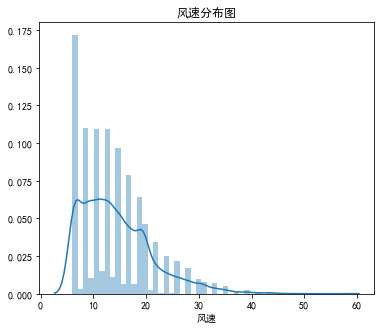

In [14]:
# 风速分布

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

fig.set_size_inches(6,5)
sns.distplot(data['风速'])

ax.set(xlabel='风速',title='风速分布图')

# 分析数据
## 整体分析

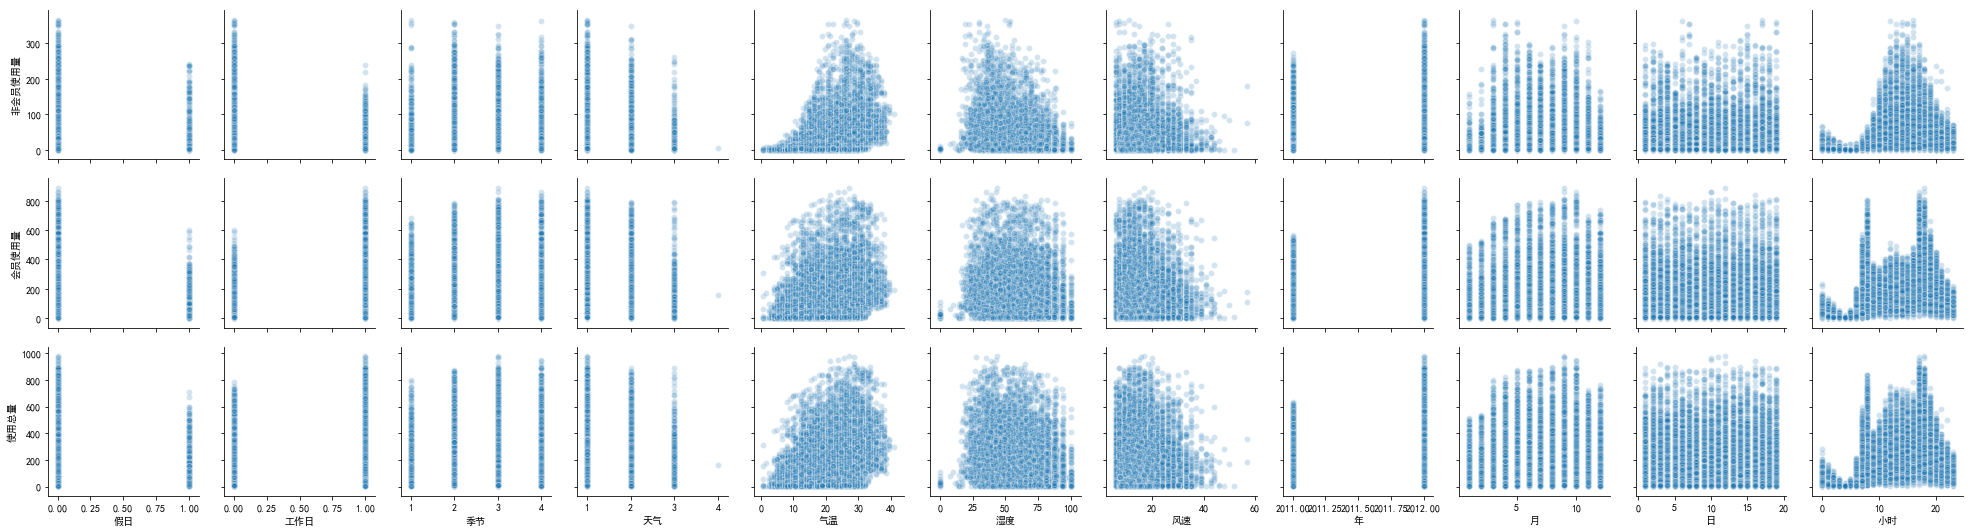

In [15]:
# 使用seaborn的整体关系图
sns.pairplot(data ,x_vars=['假日','工作日','季节','天气','气温','湿度','风速','年','月','日','小时'] ,
             y_vars=['非会员使用量','会员使用量','使用总量'] , plot_kws={'alpha': 0.2})

可以观察到：

1.非假日借车总数比假日借车总数要高；

2.会员工作日借车较多，非会员周末借车较多；

3.一季度借车最少；

4.天气对借车量影响显著；

5.气温、湿度对非会员影响较大，对会员影响较小；

6.小时数对租赁情况影响明显，会员呈现两个高峰，非会员呈正态分布

## 逐项分析


### 时间趋势分析

#### 1）年使用量总变化趋势

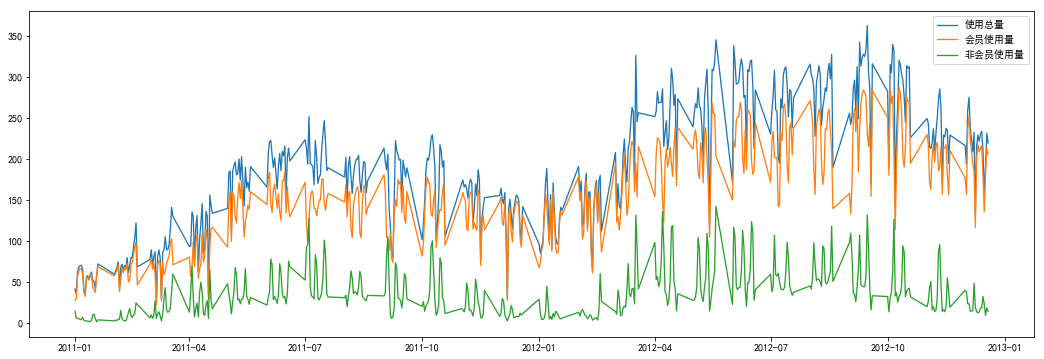

In [16]:
date = data.groupby(['日期'], as_index=False).agg({'使用总量':'mean',
                                                   '会员使用量':'mean',  
                                                   '非会员使用量':'mean'})
#将日期转换为时间格式
date['日期']=pd.to_datetime(date['日期'])

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(date['日期'] , date['使用总量'] , linewidth=1.3 , label = '使用总量' )
plt.plot(date['日期'] , date['会员使用量'] , linewidth=1.3 , label = '会员使用量' )
plt.plot(date['日期'] , date['非会员使用量'] , linewidth=1.3 , label = '非会员使用量' )
plt.legend()

### （2）月使用量变化趋势

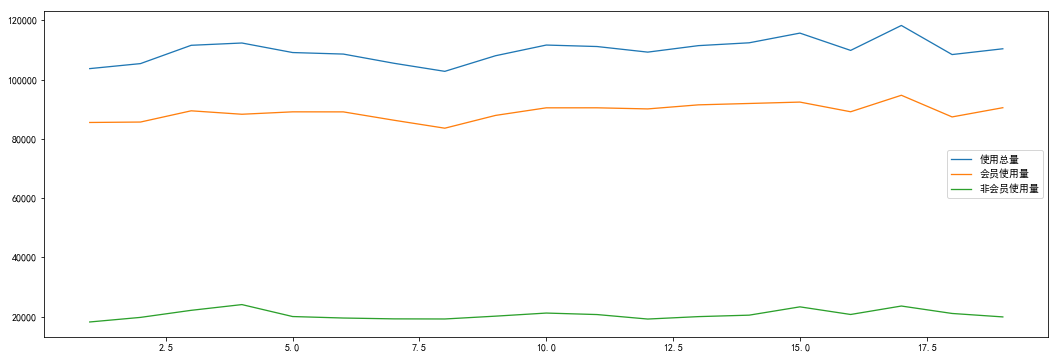

In [17]:
date = data.groupby(['日'], as_index=False).agg({'使用总量':'sum',
                                                 '会员使用量':'sum',  
                                                 '非会员使用量':'sum'})
#画图
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(date['日'] , date['使用总量'] , linewidth=1.3 , label = '使用总量' )
plt.plot(date['日'] , date['会员使用量'] , linewidth=1.3 , label = '会员使用量' )
plt.plot(date['日'] , date['非会员使用量'] , linewidth=1.3 , label = '非会员使用量' )
plt.legend()

###  （3）周使用量变化趋势

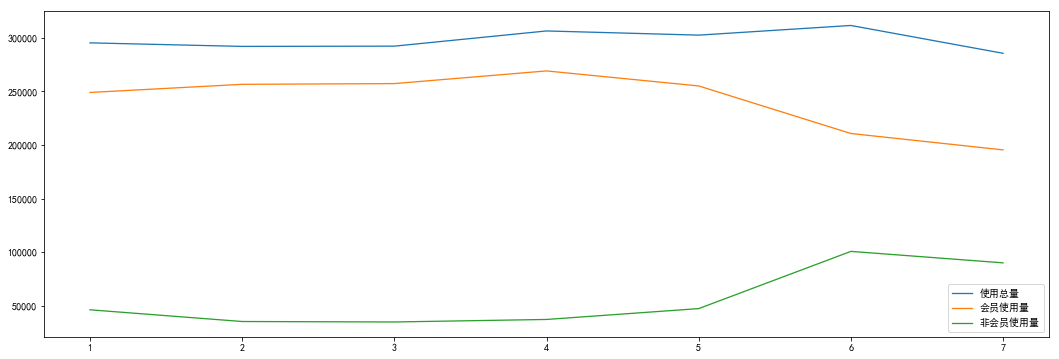

In [18]:
date = data.groupby(['星期'], as_index=False).agg({'使用总量':'sum',
                                                   '会员使用量':'sum',  
                                                   '非会员使用量':'sum'})
#画图
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(date['星期'] , date['使用总量'] , linewidth=1.3 , label = '使用总量' )
plt.plot(date['星期'] , date['会员使用量'] , linewidth=1.3 , label = '会员使用量' )
plt.plot(date['星期'] , date['非会员使用量'] , linewidth=1.3 , label = '非会员使用量' )
plt.legend()

###  （4）日使用量变化趋势

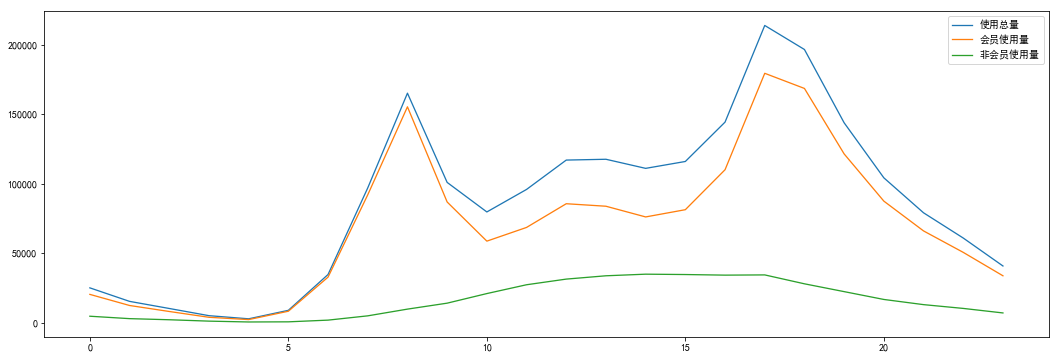

In [19]:
date = data.groupby(['小时'], as_index=False).agg({'使用总量':'sum',
                                                   '会员使用量':'sum',  
                                                   '非会员使用量':'sum'})
#画图
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(date['小时'] , date['使用总量'] , linewidth=1.3 , label = '使用总量' )
plt.plot(date['小时'] , date['会员使用量'] , linewidth=1.3 , label = '会员使用量' )
plt.plot(date['小时'] , date['非会员使用量'] , linewidth=1.3 , label = '非会员使用量' )
plt.legend()

## 影响因素分析

###  （1）季节

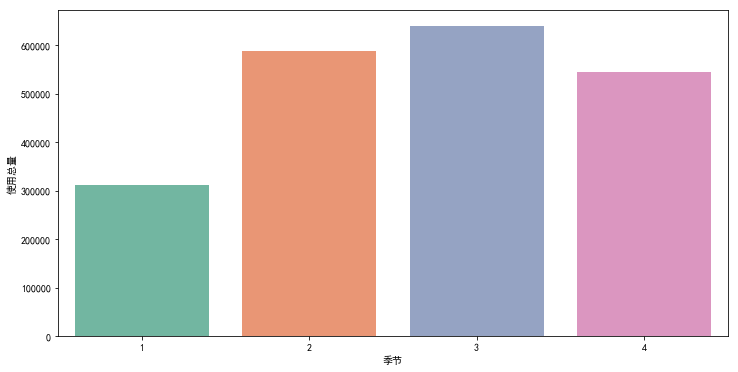

In [20]:
season = data.groupby(['季节'], as_index=False).agg({'使用总量':'sum',
                                                     '会员使用量':'sum',  
                                                     '非会员使用量':'sum'})
#绘图
season_x = season['季节']
season_y = season['使用总量']

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(12,6)

sns.barplot(season_x,y=season_y,palette='Set2') 

### （2）天气等级 

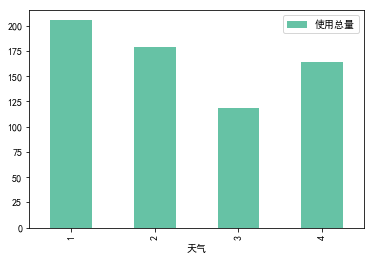

In [21]:
weather = data.groupby(['天气'], as_index=True).agg({'使用总量':'mean'})
weather.plot(kind='bar',colormap='Set2')

###  （3）温度

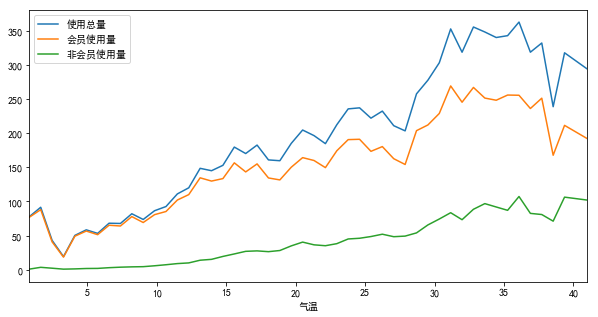

In [22]:
temp = data.groupby(['气温'], as_index=True).agg({'使用总量':'mean',
                                                  '会员使用量':'mean',  
                                                  '非会员使用量':'mean'})

temp.plot(figsize=(10,5))

### （4）湿度 

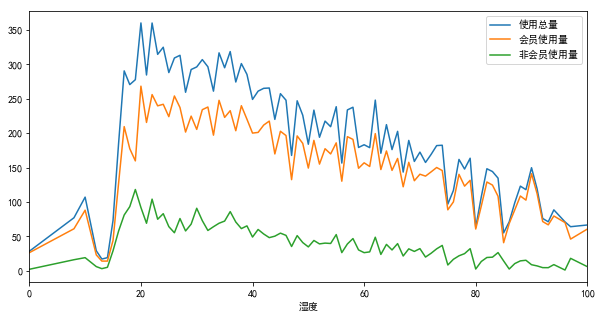

In [23]:
temp = data.groupby(['湿度'], as_index=True).agg({'使用总量':'mean',
                                                  '会员使用量':'mean',  
                                                  '非会员使用量':'mean'})

temp.plot(figsize=(10,5))

### （5）风速

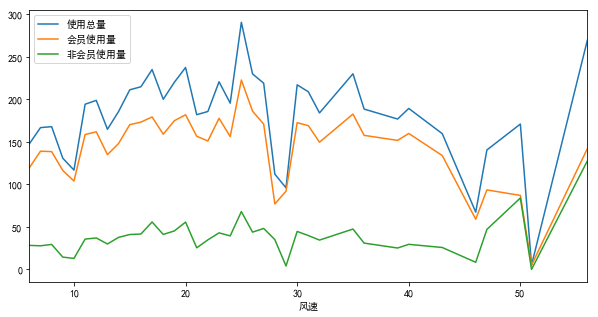

In [24]:
# 化为整数型数据
data['风速'] = data['风速'].astype(int)
windspeed = data.groupby(['风速'], as_index=True).agg({'使用总量':'mean',
                                                       '会员使用量':'mean',  
                                                       '非会员使用量':'mean'})
#绘图
windspeed.plot(figsize=(10,5))

### （6）节假日

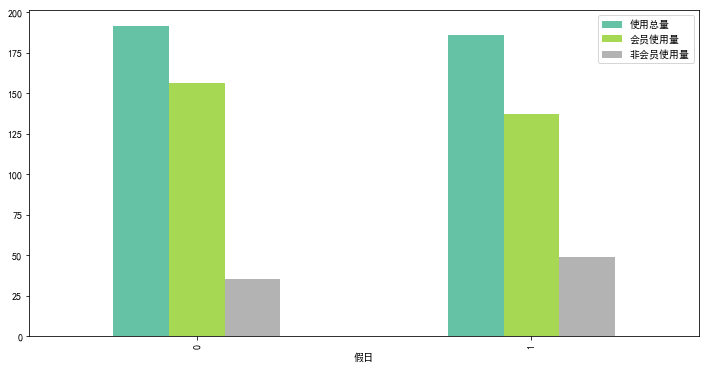

In [25]:
holiday = data.groupby(['假日'], as_index=True).agg({'使用总量':'mean',
                                                     '会员使用量':'mean',  
                                                     '非会员使用量':'mean'})
holiday.plot(kind='bar',figsize=(12,6),colormap='Set2')

### （7）工作日 

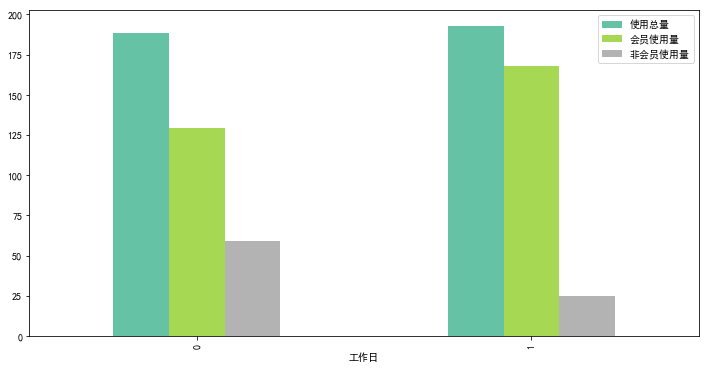

In [26]:
workday = data.groupby(['工作日'], as_index=True).agg({'使用总量':'mean',
                                                       '会员使用量':'mean',  
                                                       '非会员使用量':'mean'})
workday.plot(kind='bar',figsize=(12,6),colormap='Set2')